In [2]:
from Bio import Align
from Bio.Align import substitution_matrices
import markov_clustering as mcl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Load data
data = pd.read_csv("../data/processed/sequences.csv")
similarity_matrix = np.load("../data/processed/similarity_matrix.npy")
stochastic_matrix = np.load("../data/processed/stochastic_matrix.npy")
labels = data["Family"]
sequences = data["Sequence"]

On peut modifier le paramètre 
- `inflation` 
pour tester avec différentes valeurs

In [7]:
inflation = 1.01

# Try a mcl clustering
import networkx as nx
import markov_clustering as mc


# Run MCL with default parameters
result = mc.run_mcl(stochastic_matrix, inflation=inflation)         

# Get clusters
clusters = mc.get_clusters(result)

# Get cluster sizes
print('Number of clusters found: {}'.format(len(clusters)))
print('Cluster sizes: {}'.format([len(c) for c in clusters]))

# Evaluate the clusters
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score

# Get the labels
true_labels = labels

predicted_labels = np.zeros(len(sequences))
for i, cluster in enumerate(clusters):
    for sequence_index in cluster:
        predicted_labels[sequence_index] = i


# Compute the F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print('F1 score: {}'.format(f1))




Number of clusters found: 1036
Cluster sizes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 41, 1, 1, 31, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 62, 62, 62, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 62, 62, 62, 62, 60, 59, 59, 58, 62, 61, 58, 57, 62, 62, 46, 52, 49, 46, 46, 45, 42, 38, 42, 43, 42, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 23, 1, 1, 1, 1, 1, 1, 1, 30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 38, 37, 30, 30, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 6, 2

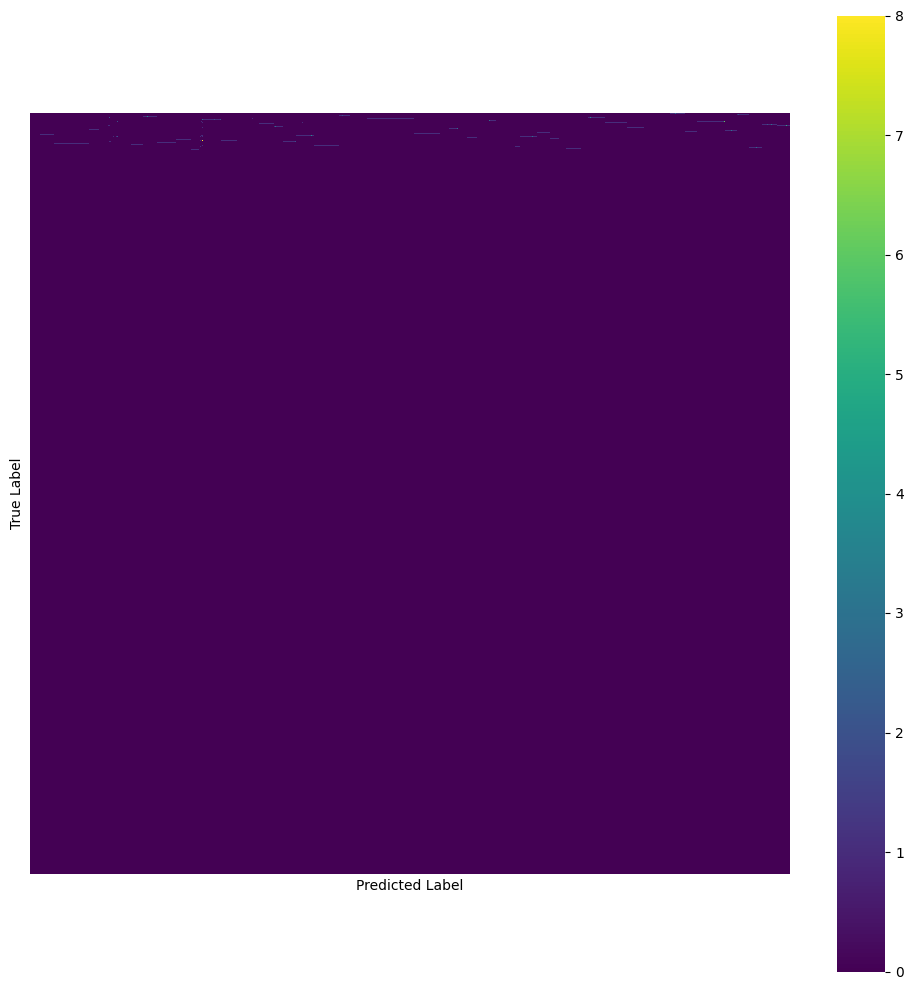

In [8]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix

cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap='viridis', square=True, xticklabels=False, yticklabels=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Show the graph

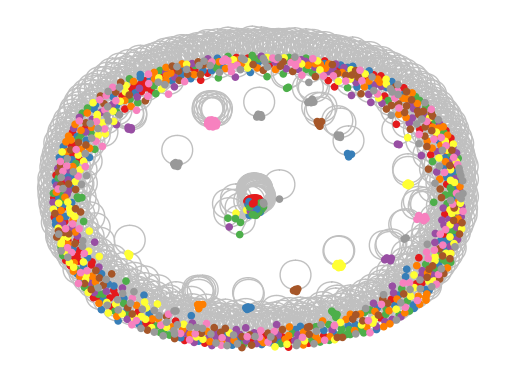

In [9]:
# Display graph with clusters in different colors
mc.draw_graph(result, clusters, node_size=20, with_labels=False, edge_color="silver", cmap=plt.cm.Set1)